In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr

In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf

## 個股模板

In [5]:
df=yf.download('ETH-USD')

[*********************100%%**********************]  1 of 1 completed


In [6]:
df['Close']

Date
2017-11-09     320.884003
2017-11-10     299.252991
2017-11-11     314.681000
2017-11-12     307.907990
2017-11-13     316.716003
                 ...     
2024-03-01    3435.053955
2024-03-02    3422.049805
2024-03-03    3490.993652
2024-03-04    3630.433838
2024-03-05    3660.309326
Name: Close, Length: 2309, dtype: float64

In [7]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2024-03-01,3341.965820,3452.626221,3341.851074,3435.053955,3435.053955,16880101987
2024-03-02,3436.159180,3459.747314,3398.898926,3422.049805,3422.049805,12024340617
2024-03-03,3422.875244,3491.168457,3372.214111,3490.993652,3490.993652,13643324467


In [9]:
returns=np.log(1+df['Adj Close'].pct_change())

In [10]:
returns

Date
2017-11-09         NaN
2017-11-10   -0.069790
2017-11-11    0.050270
2017-11-12   -0.021758
2017-11-13    0.028204
                ...   
2024-03-01    0.027487
2024-03-02   -0.003793
2024-03-03    0.019947
2024-03-04    0.039166
2024-03-05    0.008196
Name: Adj Close, Length: 2309, dtype: float64

In [11]:
mu, sigma = returns.mean(), returns.std()

In [12]:
np.random.normal(mu, sigma)

0.004484850975060018

In [13]:
# Simulated returns for 252 days
np.random.normal(mu, sigma, 252)

array([ 0.06791254, -0.00354573,  0.00753858, -0.03532987,  0.03975881,
       -0.02755138,  0.01843298, -0.01853467, -0.05241035,  0.00149574,
       -0.05806117,  0.04439158, -0.00524209,  0.08038922, -0.00977045,
       -0.01068031,  0.06056685,  0.07938169, -0.00786586,  0.00634266,
        0.00225066,  0.03560939, -0.08935831,  0.01758296, -0.05367203,
       -0.06065227,  0.06960771,  0.06300998,  0.00279122,  0.02556197,
        0.01150459, -0.0088679 ,  0.03912952,  0.06322325, -0.02923862,
       -0.01598671,  0.00127064, -0.02542355,  0.01316143, -0.00220821,
        0.02732517,  0.01069963, -0.01915869, -0.04772692, -0.056523  ,
        0.0897952 , -0.02584534,  0.02356904, -0.1150835 ,  0.02084728,
        0.14513361, -0.02943015, -0.01687457, -0.00579335,  0.00697117,
        0.03110975,  0.00712909,  0.03420071,  0.02313293, -0.00619763,
       -0.09026253, -0.03491463,  0.02551187, -0.0450152 ,  0.01070975,
       -0.04381008, -0.0151555 ,  0.05675072, -0.08529349, -0.08

In [14]:
sim_rets=np.random.normal(mu,sigma,252)

In [15]:
df['Adj Close'].iloc[-1]

3660.309326171875

In [16]:
initial=df['Adj Close'].iloc[-1]

In [17]:
initial*(sim_rets+1).cumprod()

array([3453.8906244 , 3143.99261865, 3268.52813459, 3363.4919894 ,
       3380.28145973, 3599.12803534, 3243.12142284, 3330.10370146,
       3403.49075965, 3268.60095413, 3304.24867166, 3351.57862664,
       3286.53262198, 3833.36779008, 3752.41096902, 3737.40995311,
       3812.91980098, 3839.16006871, 3872.80892053, 4287.4002104 ,
       4201.57686975, 4073.18077653, 4332.06918363, 4612.77973271,
       4800.17154897, 4700.09897404, 4621.81054156, 4477.48517636,
       4410.45963023, 4185.50952235, 4396.92340932, 4327.63868961,
       4632.90073535, 4411.38802577, 4423.9015928 , 4156.78208853,
       4185.21171566, 4115.37215258, 4121.40691313, 4092.43417554,
       3999.05465221, 3951.97249313, 4176.21385242, 4394.27737002,
       4213.21809049, 4265.23902666, 4203.09763097, 4147.51267981,
       4040.78710104, 4061.8398959 , 4136.26807816, 4083.67807824,
       3855.44419687, 3450.09040724, 3388.83212636, 3293.7961576 ,
       3221.35806753, 3111.4915247 , 3006.65073945, 3263.35285

In [18]:
sim_prices=initial*(sim_rets+1).cumprod()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


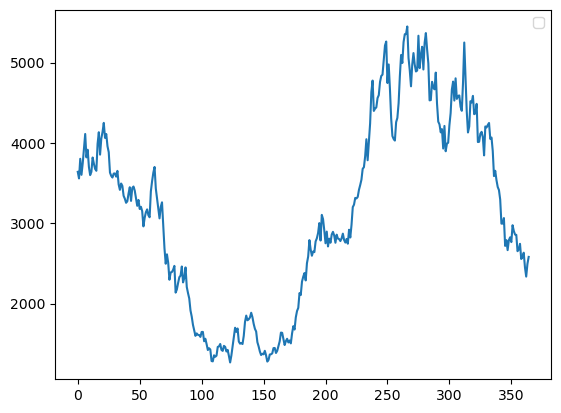

In [34]:
plt.plot(sim_prices)
plt.legend()

Text(0.5, 1.0, 'ETH-USD Simulation Price')

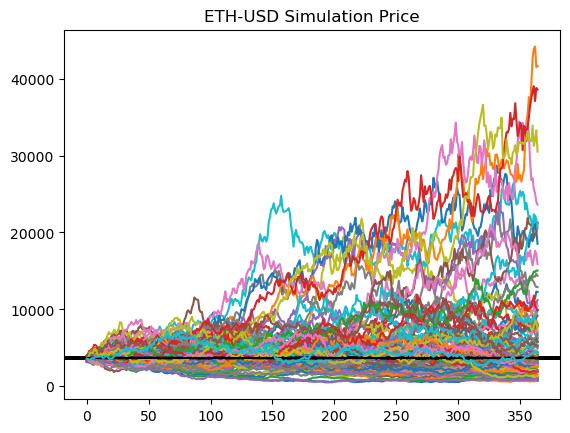

In [35]:
for i in range(100):
    sim_rets=np.random.normal(mu,sigma,365)
    sim_prices=initial*(sim_rets+1).cumprod()
    plt.axhline(initial, c='k')
    plt.plot(sim_prices)
plt.title('ETH-USD Simulation Price')

In [36]:
expected_price = sim_prices.mean()  # or sim_prices.median()
expected_price

4458.352644963627

## Stock Portfolio

In [22]:
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib.pyplot as plots
# allows currency formatting
import locale
locale.setlocale(locale.LC_ALL, '')

'C/UTF-8/C/C/C/C'

In [54]:
# traditional savings calculator approach
pv=10000
time_horizon=30
i=.07
additions=10000

for year in range(time_horizon):
    ending = pv * (1+i) + additions
    print(locale.currency(ending, grouping=True))
    pv=ending

$20,700.00
$32,149.00
$44,399.43
$57,507.39
$71,532.91
$86,540.21
$102,598.03
$119,779.89
$138,164.48
$157,835.99
$178,884.51
$201,406.43
$225,504.88
$251,290.22
$278,880.54
$308,402.17
$339,990.33
$373,789.65
$409,954.92
$448,651.77
$490,057.39
$534,361.41
$581,766.71
$632,490.38
$686,764.70
$744,838.23
$806,976.91
$873,465.29
$944,607.86
$1,020,730.41


In [55]:
pv=10000
expected_return=.09
volatility=.18
time_horizon=30
annual_addition=10000

In [56]:
print("\tReturn","\t\tEnding Value".rjust(18))
for year in range(time_horizon):
    market_return=np.random.normal(expected_return, volatility)
    fv=pv*(1+market_return)+annual_addition
    print("\t{}".ljust(10).format(round(market_return,4)),"\t{}".rjust(10).format(locale.currency(fv, grouping=True)))
    pv=fv

	Return     		Ending Value
	0.0206               	$20,205.54
	0.0355               	$30,923.07
	0.008               	$41,169.93
	-0.0639               	$48,537.89
	0.0983               	$63,308.81
	0.264               	$90,019.44
	0.1392               	$112,549.02
	-0.2517               	$94,221.02
	0.2452               	$127,321.64
	0.0482               	$143,462.02
	0.3865               	$208,906.44
	0.1685               	$254,109.66
	0.0845               	$285,578.39
	-0.1494               	$252,905.59
	-0.0241               	$256,822.28
	0.186               	$314,592.63
	0.3894               	$447,093.27
	0.0331               	$471,897.49
	-0.0245               	$470,348.01
	0.0134               	$486,627.31
	0.1353               	$562,483.80
	0.0987               	$628,025.01
	-0.3178               	$438,436.41
	0.0279               	$460,685.09
	0.2951               	$606,631.41
	0.508               	$924,810.90
	-0.0521               	$886,650.62
	0.2467               	$1,115,35

In [60]:
# Simulation of Portfolio
sim=DataFrame()
iterations=5000

In [2]:
for x in range(iterations):
    expected_return=.09
    volatility=.18
    time_horizon=30
    pv=10000
    annual_investment=10000
    stream=[]
    for i in range(time_horizon):
        end=round(pv*(1+np.random.normal(expected_return,volatility))+annual_investment,2)
        
        stream.append(end)
        
        pv=end
        
    sim[x]=stream

NameError: name 'iterations' is not defined

In [3]:
first_five=list(range(5))
sim[first_five]

NameError: name 'sim' is not defined

In [1]:
plots.plot(sim[first_five])

NameError: name 'plots' is not defined

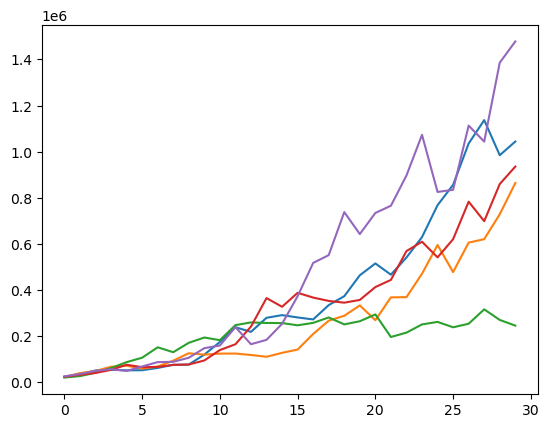

In [65]:
plots.plot(sim[first_five])

In [67]:
# Summary statistics
print('Count:',len(sim.loc[29]))
print('Mean:',locale.currency(np.mean(sim.loc[29]),grouping=True))
print('SD:',locale.currency(np.std(sim.loc[29]),grouping=True))
print('Max:',locale.currency(np.max(sim.loc[29]),grouping=True))
print('Min:',locale.currency(np.min(sim.loc[29]),grouping=True))

Count: 5000
Mean: $1,528,875.28
SD: $1,211,520.39
Max: $13,645,808.72
Min: $155,296.98


In [68]:
ending_values=sim.loc[29]
ending_values.describe()

count    5.000000e+03
mean     1.528875e+06
std      1.211642e+06
min      1.552970e+05
25%      7.435818e+05
50%      1.194442e+06
75%      1.908881e+06
max      1.364581e+07
Name: 29, dtype: float64

(array([3.183e+03, 1.286e+03, 3.380e+02, 1.160e+02, 4.400e+01, 1.600e+01,
        1.100e+01, 2.000e+00, 3.000e+00, 1.000e+00]),
 array([  155296.98 ,  1504348.154,  2853399.328,  4202450.502,
         5551501.676,  6900552.85 ,  8249604.024,  9598655.198,
        10947706.372, 12296757.546, 13645808.72 ]),
 <BarContainer object of 10 artists>)

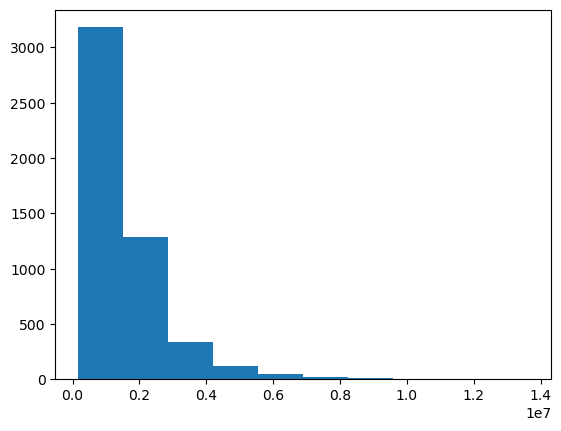

In [71]:
plots.hist(ending_values, bins=10)

In [70]:
# calculating the probability of seeing a specific ending_value or less :
len(ending_values[ending_values<1000000])/len(ending_values)

0.4056